In [ ]:
import matplotlib.pyplot as plt
#print (Taxi_Data.head())

###EDA (Exploratory Data Analysis)

#print(Taxi_Data.shape)
#print(Taxi_Data.info)

#Null_Data = Taxi_Data.isnull().sum()
#print(Null_Data)

# Describe = Taxi_Data.describe()
# print (Describe)

import pandas as pd
from geopy.geocoders import Nominatim
import time  # to avoid rate limits

# Load your original DataFrame from Excel
Taxi_Data = pd.read_excel("Taxi Fare Prediction DataSet.xlsx")

# Create a geocoder object
geolocator = Nominatim(user_agent="geoapiExercises" , timeout=5)

# Initialize lists to store latitude and longitude
latitude = []
longitude = []

# Geocode each place name from the "Location" column
for place in Taxi_Data["Ward"]:
    location = geolocator.geocode(place)
    if location:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        # If geocoding fails, append None or some default value
        latitude.append(None)
        longitude.append(None)
    time.sleep(1)  # Pause to avoid rate limits

# Add the new columns to the original DataFrame
Taxi_Data["Latitude"] = latitude
Taxi_Data["Longitude"] = longitude



# Display the updated DataFrame
print(Taxi_Data["Latitude"])


Taxi_Data.to_csv("Taxi Data.csv", index= False)

0            NaN
1      15.346893
2      12.887720
3      24.351722
4      13.292399
         ...    
240    22.488485
241    13.154848
242    12.960608
243    13.015473
244    12.943176
Name: Latitude, Length: 245, dtype: float64


In [ ]:
Taxi_Data.to_csv("Taxi Data.csv", index= False)

In [ ]:
New_Taxi_Data= pd.read_csv("Taxi Data.csv")

In [ ]:
print(New_Taxi_Data.head())

             Ward  Searches  Searches which got estimate  Searches for Quotes  \
0     Other Wards   3071626                      2712391              1890877   
1  Shantala Nagar   2401161                      2384599              2067653   
2  Doddakanahalli   1727250                      1711471              1456511   
3           Agara   1226026                      1214797              1043176   
4     Koramangala   1169452                      1158300               994218   

   Searches which got Quotes  Bookings  Completed Trips  \
0                     975708    954414           589585   
1                     856568    841607           474271   
2                     596480    587089           350792   
3                     520539    508562           336728   
4                     528008    515062           334904   

   Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
0                    0.883                               0.697   
1                    0.993

In [ ]:
New_Taxi_Data = New_Taxi_Data[New_Taxi_Data["Ward"] != "Other Wards"]
print(New_Taxi_Data.head())

             Ward  Searches  Searches which got estimate  Searches for Quotes  \
1  Shantala Nagar   2401161                      2384599              2067653   
2  Doddakanahalli   1727250                      1711471              1456511   
3           Agara   1226026                      1214797              1043176   
4     Koramangala   1169452                      1158300               994218   
5         Adugodi   1191234                      1182173              1005962   

   Searches which got Quotes  Bookings  Completed Trips  \
1                     856568    841607           474271   
2                     596480    587089           350792   
3                     520539    508562           336728   
4                     528008    515062           334904   
5                     536543    522711           313312   

   Search-to-estimate Rate  Estimate-to-search for quotes Rate  \
1                    0.993                               0.867   
2                    0.991

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
import re

New_Taxi_Data["Average Fare per Trip"] = New_Taxi_Data["Average Fare per Trip"].apply(lambda x: float(re.sub(r"[^\d.]", "", x)))

In [ ]:
print(New_Taxi_Data["Average Fare per Trip"])

1      138.74
2      159.54
3      137.67
4      128.74
5      131.45
        ...  
240    128.51
241    112.07
242     97.72
243    114.00
244    143.86
Name: Average Fare per Trip, Length: 244, dtype: float64


In [ ]:
map = folium.Map(location=[37, -95], zoom_start=4)

In [ ]:
# Check which columns have NaN values
print(New_Taxi_Data.isna().any())  # Returns True if any NaN values are present


Ward                                  False
Searches                              False
Searches which got estimate           False
Searches for Quotes                   False
Searches which got Quotes             False
Bookings                              False
Completed Trips                       False
Search-to-estimate Rate               False
Estimate-to-search for quotes Rate    False
Quote Acceptance Rate                 False
Quote-to-booking Rate                 False
Cancelled Bookings                    False
Booking Cancellation Rate             False
Conversion Rate                       False
Drivers' Earnings                     False
Average Distance per Trip (km)        False
Average Fare per Trip                 False
Distance Travelled (km)               False
Latitude                               True
Longitude                              True
dtype: bool


In [ ]:
# Drop rows with NaN latitude or longitude
Cleaned_Taxi_data = New_Taxi_Data.dropna(subset=["Latitude", "Longitude"])


In [ ]:
# Replace NaNs with a specific value (e.g., 0)
New_Taxi_Data["Latitude"].fillna(0, inplace=True)
New_Taxi_Data["Longitude"].fillna(0, inplace=True)


In [ ]:
# Create heat_data from cleaned DataFrame
heat_data = [
    (row["Latitude"], row["Longitude"], row.get("Average Fare per Trip", 1)) for _, row in Cleaned_Taxi_data.iterrows()
]

In [ ]:
map = folium.Map(location=[20, 0], zoom_start=2)

In [ ]:
HeatMap(heat_data, radius=15, blur=10, max_zoom=1, min_opacity=0.5).add_to(map)

In [ ]:
map.save("Average_Fare_Per_Ward.html")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = Cleaned_Taxi_data[['Searches', 'Bookings', 'Completed Trips', 'Drivers\' Earnings', 'Distance Travelled (km)']]
target = Cleaned_Taxi_data['Average Fare per Trip']

In [ ]:
import re

Cleaned_Taxi_data["Drivers\' Earnings"] = Cleaned_Taxi_data["Drivers\' Earnings"].apply(lambda x: float(re.sub(r"[^\d.]", "", x)))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = Cleaned_Taxi_data[['Searches', 'Bookings', 'Completed Trips', 'Drivers\' Earnings', 'Distance Travelled (km)']]
target = Cleaned_Taxi_data['Average Fare per Trip']

Root Mean Squared Error: 11.114681762379865


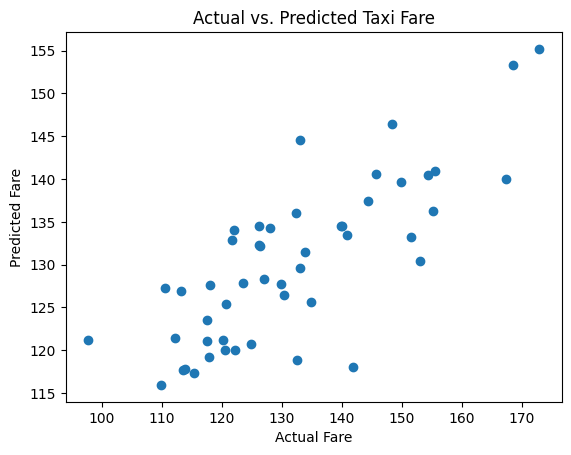

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Test the model
y_pred = rf_regressor.predict(X_test)

# Calculate and display RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted Taxi Fare")
plt.show()

Linear Regression RMSE: 12.607027212171081


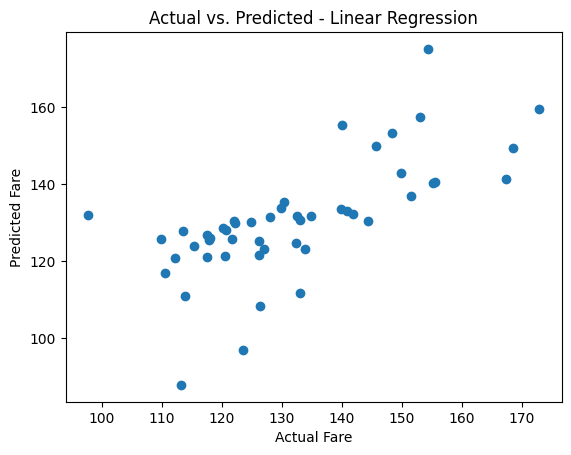

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Linear Regression RMSE:", rmse)

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted - Linear Regression")
plt.show()


Decision Tree RMSE: 15.355897756834908


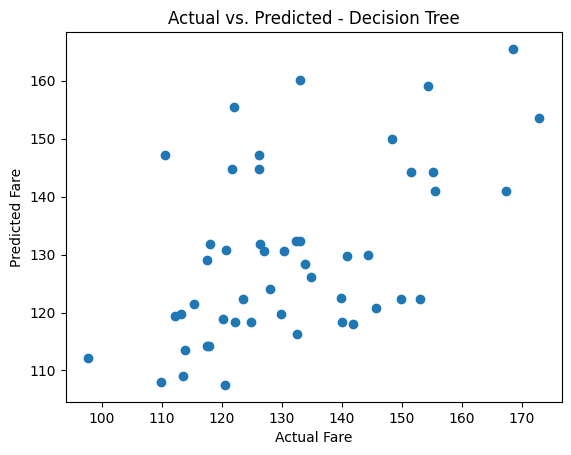

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Decision Tree RMSE:", rmse)

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted - Decision Tree")
plt.show()


Gradient Boosting RMSE: 10.577164751840204


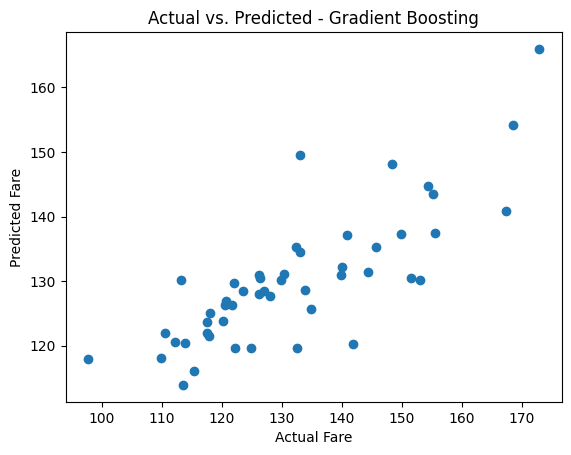

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Gradient Boosting RMSE:", rmse)

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted - Gradient Boosting")
plt.show()


SVR RMSE: 16.626266719864354


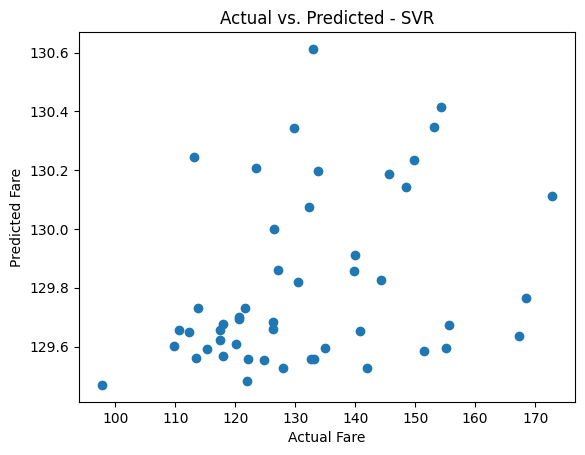

In [ ]:
from sklearn.svm import SVR

# Train Support Vector Regression model with RBF kernel
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred = svr.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("SVR RMSE:", rmse)

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted - SVR")
plt.show()


KNN Regression RMSE: 16.664127325191803


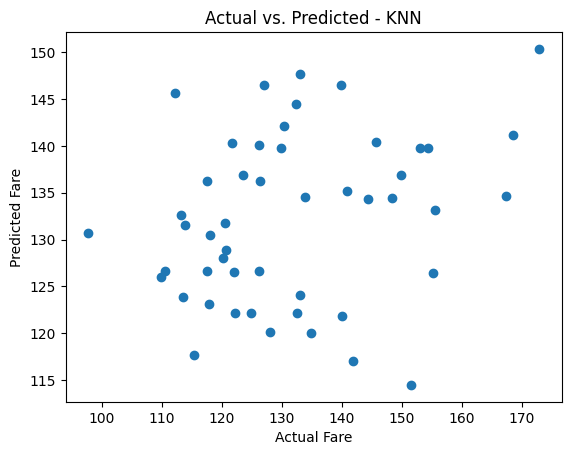

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train K-Nearest Neighbors model with 5 neighbors
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_reg.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("KNN Regression RMSE:", rmse)

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted - KNN")
plt.show()


In [ ]:
import joblib
joblib.dump(gb_reg, 'taxi_fare_prediction_model_Gradient_Boosting Model.pkl')
joblib.dump(rf_regressor, 'taxi_fare_prediction_model_Random_Forest.pkl')
joblib.dump(lin_reg, 'taxi_fare_prediction_model_Linear_Regression.pkl')


['taxi_fare_prediction_model_Linear_Regression.pkl']

In [ ]:
gb_reg_Reload = joblib.load("taxi_fare_prediction_model_Gradient_Boosting Model.pkl")

In [ ]:
Test_Data_For_Predictions = Cleaned_Taxi_data[['Searches', 'Bookings', 'Completed Trips', 'Drivers\' Earnings', 'Distance Travelled (km)']].head(25)

In [ ]:
Fare_Prediction = gb_reg_Reload.predict(Test_Data_For_Predictions)

In [ ]:
print("Predicted Fare is:" , Fare_Prediction)

Predicted Fare is: [141.40897291 151.15500011 137.74126182 131.92894005 131.92894005
 131.92894005 149.47407572 159.25231707 126.48480839 130.14590174
 130.14590174 152.50191234 131.55945482 124.97299222 137.32286272
 128.48537923 130.16558845 127.25578257 144.77398391 128.68428144
 120.86418216 149.27391742 155.37384051 125.64587051 137.26166362]
